MovieWriter imagemagick unavailable; using Pillow instead.


/home/ubuntu-compute/miniconda3/envs/qdev/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/ubuntu-compute/miniconda3/envs/qdev/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


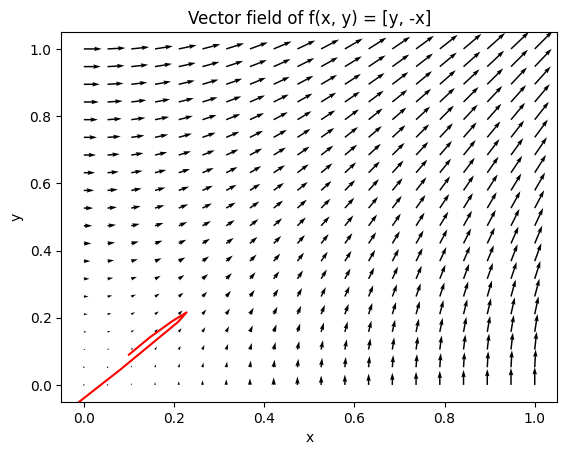

In [16]:
#make a vector function plot of a given vector derivative function

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

t = 5

def f(x, y):
    return np.array([np.exp(1j*t)*y, np.exp(-1j*t)*x])

x = np.linspace(-0, 1, 20)
y = np.linspace(-0, 1, 20)

X, Y = np.meshgrid(x, y)
U, V = f(X, Y)

"""fig = plt.figure()
ax = fig.add_subplot(111)
ax.quiver(X, Y, U, V)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Vector field of f(x, y) = [y, -x]')
plt.show()"""

#make an animation of the field varying with t
import matplotlib.animation as animation
from IPython.display import HTML


fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Vector field of f(x, y) = [y, -x]')
q = ax.quiver(X, Y, U, V)
#intiate a trajectory by defining a line with initial conditions
line, = ax.plot([0.1], [0.09], 'r-')

oldt = 0
def update(T):
    global t
    global oldt
    t = T
    U, V = f(X, Y)
    q.set_UVC(U, V)
    #update the trajectory
    lx, ly = line.get_data()
    dx, dy = f(lx[-1], ly[-1])*(t-oldt)
    line.set_data(list(lx) + [lx[-1] + dx], list(ly) + [ly[-1] + dy])
    oldt = t
    return q, line

ani = animation.FuncAnimation(fig, update, frames=np.linspace(0, 20*np.pi, 100), interval=100)
#save the animation as a gif
ani.save('vector_field.gif', writer='imagemagick', fps=10)
#display the animation
HTML(ani.to_html5_video())



